In [1]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
from dataclasses import asdict, is_dataclass, dataclass
import os
import json
import pickle
from pandas.api.types import is_datetime64_any_dtype

from src.common.AssetData import AssetData
from src.common.AssetDataService import AssetDataService
from src.common.AssetFileInOut import AssetFileInOut 
from src.databaseService.EstablishStocks import EstablishStocks 
from src.databaseService.OutsourceLoader import OutsourceLoader 


In [ ]:
ticker="MSFT"
stock_info = yf.Ticker(ticker)
stockPrice=yf.download(ticker,period="max")

print(stock_info.info)

stockPriceAdjClose=stockPrice["AdjClose"]
print(stockPriceAdjClose.index.tz)
pd.Timestamp.now(tz="UTC")

qf = stock_info.quarterly_cashflow

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSFT']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MSFT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MSFT&crumb=Edge%3A+Too+Many+Requests


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
stockPrice=yf.download(ticker,period="max")
print(stock_info.dividends[-2:-1])
from src.common.DataFrameTimeOperations import DataFrameTimeOperationsPandas as DO
print(DO(stockPrice).getIndex(pd.Timestamp(2024,6,10)))

print(stockPrice.iloc[1571-2:1571+10])
print(stockPrice.iloc[15716-2:15716+10])
print(stockPrice.iloc[-100:-90])
print(stockPrice.iloc[-10:-1])

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSFT']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
$MSFT: possibly delisted; no price data found  (1d 1926-05-14 -> 2025-04-19)


Series([], dtype: object)
-1
Empty DataFrame
Columns: [(Adj Close, MSFT), (Close, MSFT), (High, MSFT), (Low, MSFT), (Open, MSFT), (Volume, MSFT)]
Index: []
Empty DataFrame
Columns: [(Adj Close, MSFT), (Close, MSFT), (High, MSFT), (Low, MSFT), (Open, MSFT), (Volume, MSFT)]
Index: []
Empty DataFrame
Columns: [(Adj Close, MSFT), (Close, MSFT), (High, MSFT), (Low, MSFT), (Open, MSFT), (Volume, MSFT)]
Index: []
Empty DataFrame
Columns: [(Adj Close, MSFT), (Close, MSFT), (High, MSFT), (Low, MSFT), (Open, MSFT), (Volume, MSFT)]
Index: []


In [6]:
fullSharePrice = stock_info.history(period="max", raise_errors = True)
fullSharePrice

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

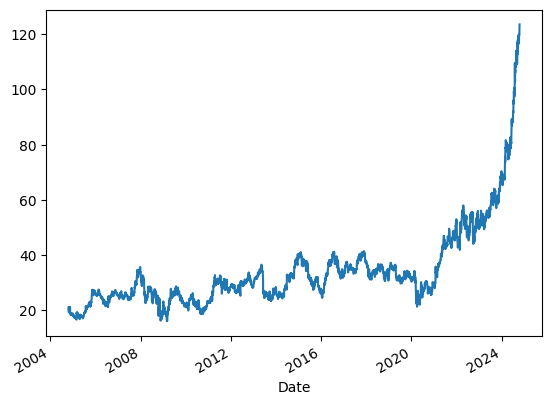

In [ ]:
stockPrice["Open"].plot()
plt.show()

In [ ]:
import polars as pl
import pyarrow
stock_hist=stock_info.history(period="max")
hist=stock_hist[["Open", "High", "Low", "Close"]]
div=stock_hist["Stock Splits"]
stock_hist["Stock Splits"]
stock_hist["Dividends"]
stock_hist_reset = stock_hist.reset_index()
print(type(stock_hist_reset['Date'][0]))
print(type(pl.from_pandas(stock_hist.reset_index())))
print(pl.from_pandas(stock_hist))
print(pl.from_pandas(stock_hist.reset_index()))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'polars.dataframe.frame.DataFrame'>
shape: (7_228, 7)
┌────────────┬────────────┬────────────┬────────────┬──────────┬───────────┬──────────────┐
│ Open       ┆ High       ┆ Low        ┆ Close      ┆ Volume   ┆ Dividends ┆ Stock Splits │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---      ┆ ---       ┆ ---          │
│ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64      ┆ f64       ┆ f64          │
╞════════════╪════════════╪════════════╪════════════╪══════════╪═══════════╪══════════════╡
│ 1.22893    ┆ 1.22893    ┆ 1.210024   ┆ 1.219477   ┆ 13718164 ┆ 0.0       ┆ 0.0          │
│ 1.219476   ┆ 1.22893    ┆ 1.210023   ┆ 1.22893    ┆ 3828860  ┆ 0.0       ┆ 0.0          │
│ 1.22893    ┆ 1.22893    ┆ 1.210023   ┆ 1.210023   ┆ 908190   ┆ 0.0       ┆ 0.0          │
│ 1.210023   ┆ 1.22893    ┆ 1.210023   ┆ 1.210023   ┆ 509419   ┆ 0.0       ┆ 0.0          │
│ 1.210023   ┆ 1.22893    ┆ 1.210023   ┆ 1.210023   ┆ 366453

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [ ]:
fullFinancials = stock_info.quarterly_financials
fullFinancials = fullFinancials.T
print(fullFinancials["Date"])
fullFinancials.index.name = 'Date'
fullFinancials.index = pd.to_datetime(fullFinancials.index)

fullFinancials["Total Revenue"]

KeyError: 'Date'

In [ ]:
outsourceLoader = OutsourceLoader(outsourceOperator="yfinance")
asset: AssetData = outsourceLoader.load(ticker="irm")

assetVolDict = asset.volume.to_dict()
assetToVol = pd.Series(assetVolDict)

assetdict = AssetDataService.to_dict(asset)
#with open(os.path.join(ticker +".pkl"), 'wb') as f:
#    pickle.dump(assetdict, f)

stock_info = yf.Ticker("goog")
stock_info.ticker
stock_info.isin


c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


'ARDEUT116159'

In [ ]:
with open(os.path.join(ticker + ".pkl"), 'rb') as f:
    assetdictread = pickle.load(f)


# Convert the dictionary back to an instance of the dataclass
loadedAsset = AssetDataService.from_dict(assetdictread)

(loadedAsset.EBITDA)

FileNotFoundError: [Errno 2] No such file or directory: 'irm.pkl'

In [ ]:
asset.volume = None
#assetVolDict = asset.volume.to_dict() or {}
type(pd.DataFrame(None))

pandas.core.frame.DataFrame

In [ ]:
outsourceLoader = OutsourceLoader(outsourceOperator="yfinance")
asset: AssetData = outsourceLoader.load(ticker="irm")
stock = yf.Ticker("aaaa")
df=stock.history(period="max", raise_errors=True)
df.index

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Exception: AAAA: No timezone found, symbol may be delisted

In [ ]:
stock = yf.Ticker("aaaa")
outsourceLoader = OutsourceLoader(outsourceOperator="yfinance")

try:
    asset: AssetData = outsourceLoader.load(ticker="AAAA", raise_error=True)
except TypeError:
    pass
#type(stock.history(period="max"))

